<h1>Simple One Hidden Layer Neural Network</h1>


<h2>Objective</h2><ul><li> How to create simple Neural Network in pytorch.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will use a single-layer neural network to classify non linearly seprable data in 1-Ddatabase.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network, Criterion Function, Optimizer, and Train the Model</a></li>
</ul>

<h2>Preparation</h2>


We'll need the following libraries


In [1]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

Used for plotting the model


In [2]:
def plot_stuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')

    if leg == True:
        plt.legend()
    else:
        pass

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [4]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        self.a1 = None
        self.l1 = None
        self.l2 = None
    
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        return sigmoid(self.l2)

Define the training function:

In [6]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0

    for epoch in range(epochs):
        total = 0

        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total+=loss.item() 

        cost.append(total)

        if epoch % 300 == 0:    
            plot_stuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()

    return cost

<h2 id="Makeup_Data">Make Some Data</h2>


In [7]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer and Train the Model</h2>


Create the Cross-Entropy loss function: 


In [8]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network, Optimizer, and Train the Model:


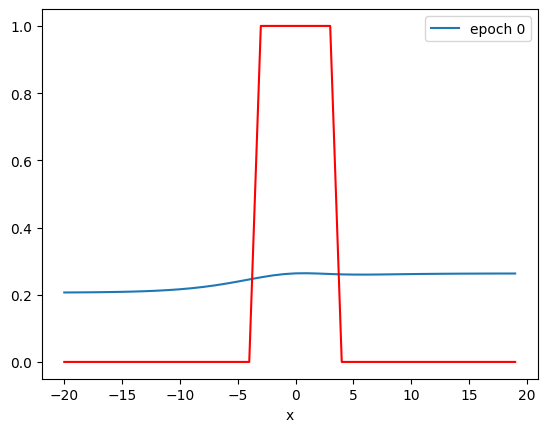

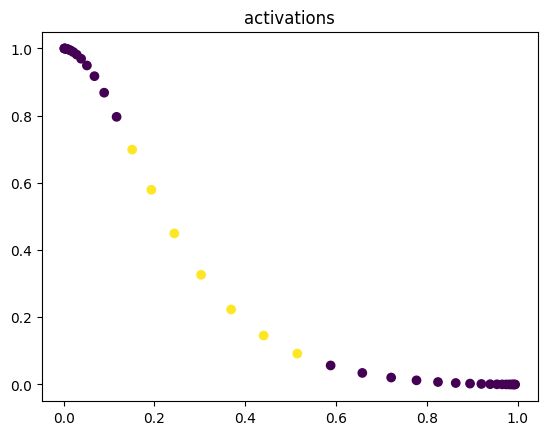

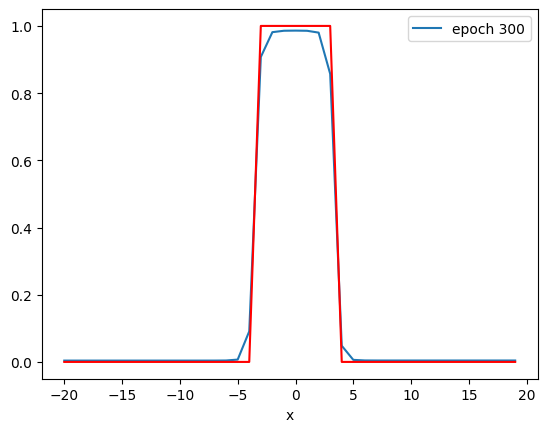

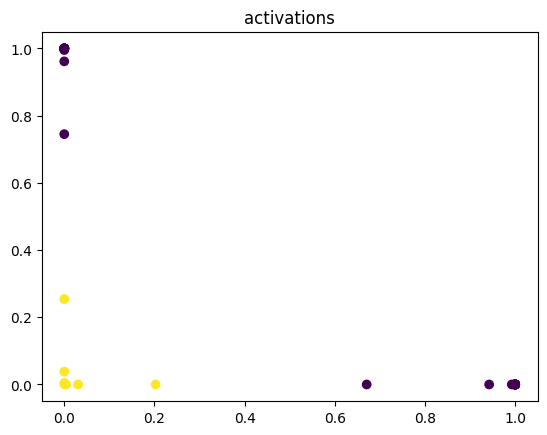

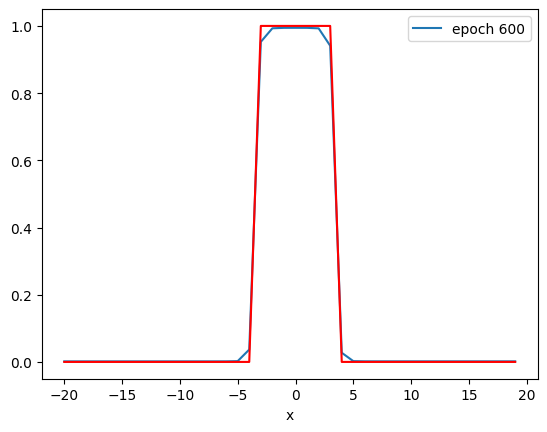

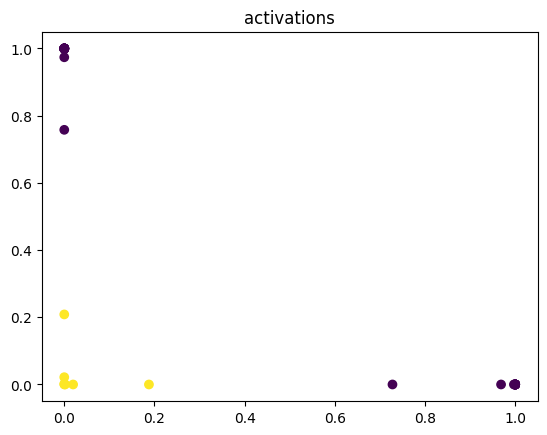

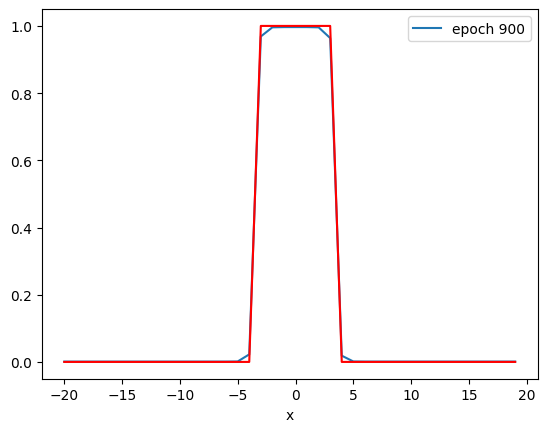

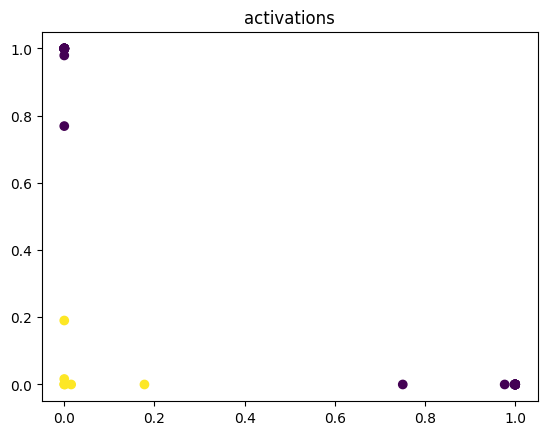

Text(0.5, 1.0, 'cross entropy loss')

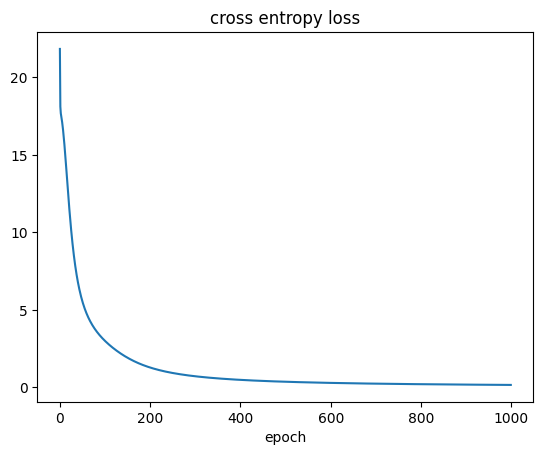

In [9]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1

model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  activation, you see by the 600th epoch that the data has been mapped to a linearly separable space.


we can make a prediction for a arbitrary one tensors 


In [10]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.9969], grad_fn=<SigmoidBackward0>)

we can make a prediction for some arbitrary one tensors  


In [11]:
X_ = torch.tensor([[0.0], [2.0], [3.0]])
Yhat = model(X_)
Yhat

tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward0>)

we  can threshold the predication


In [12]:
Yhat = Yhat > 0.5
Yhat

tensor([[True],
        [True],
        [True]])

<h3>Practice</h3>


Repeat the previous steps above by using the MSE cost or total loss: 


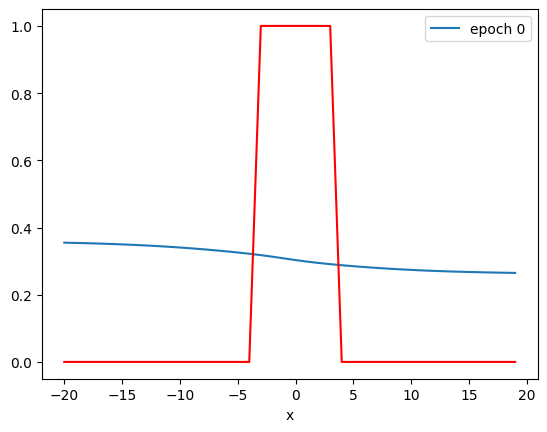

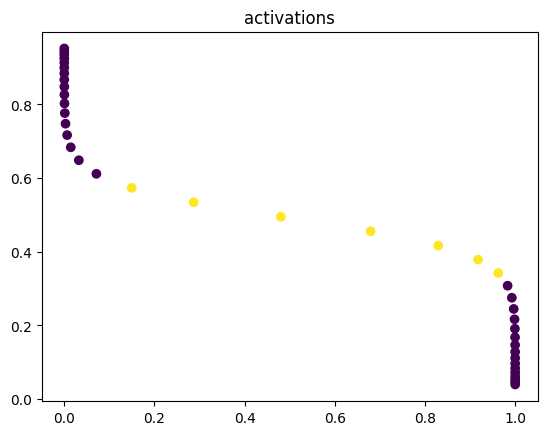

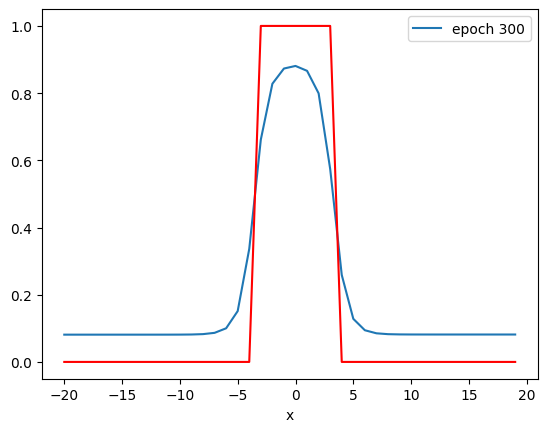

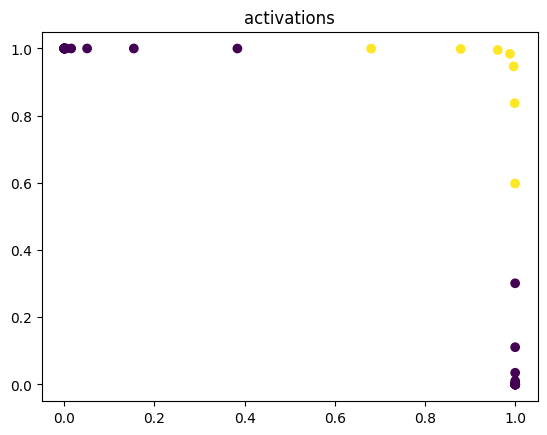

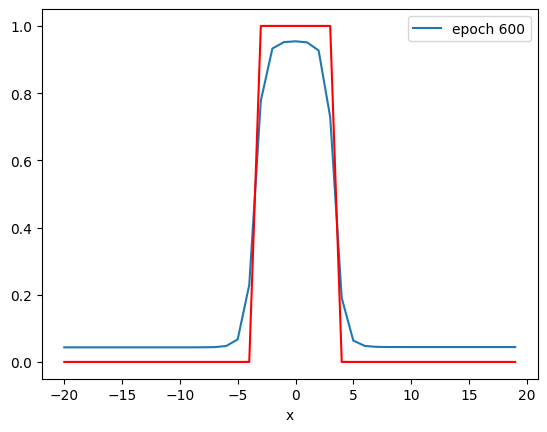

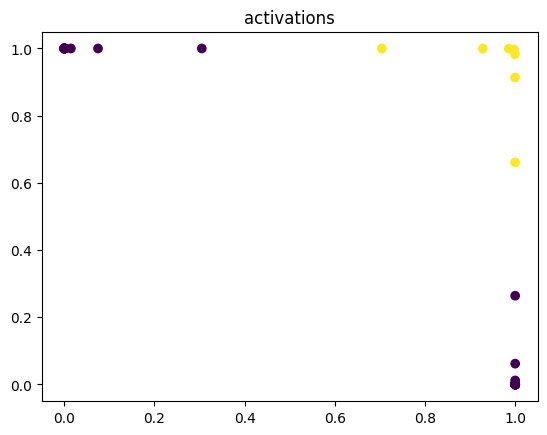

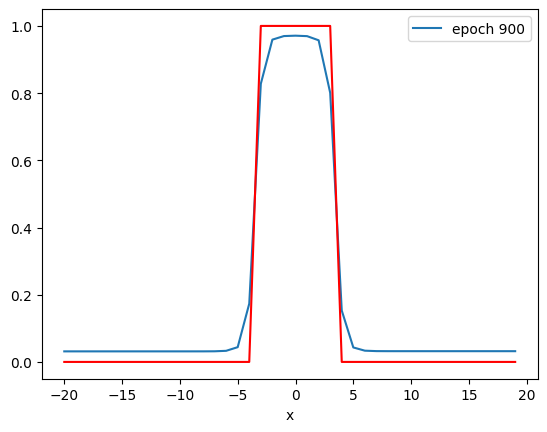

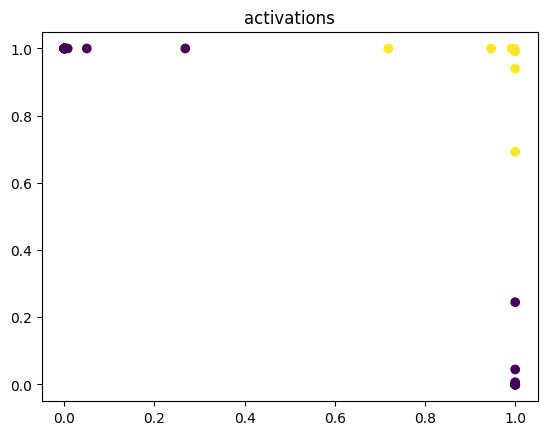

Text(0.5, 1.0, 'MSE loss')

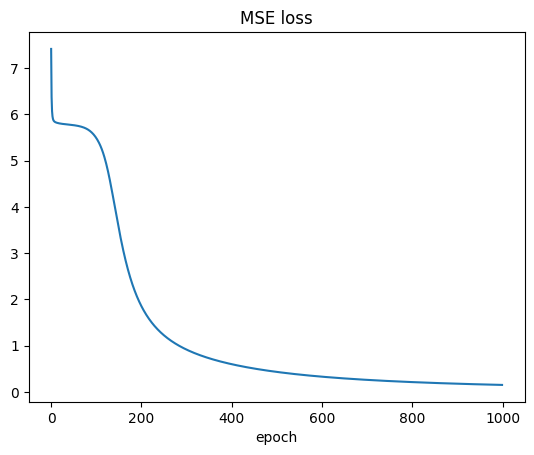

In [15]:
D_in = 1
H = 2
D_out = 1
lr = 0.1

model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()

cost = train(Y, X, model, optimizer, criterion, epochs=1000)

plt.plot(cost)
plt.xlabel('epoch')
plt.title('MSE loss')